In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/cvinnn/Data-Mining/refs/heads/main/customer_churn.xlsx%20-%20Telco_Churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
#Show Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#META DATA

In [ ]:
#Defining a list of column names to be dropped from the DataFrame
drop_columns = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
                'Latitude', 'Longitude', 'Churn Reason']
#Drop the column list
df = df.drop(columns=drop_columns)

In [ ]:
#Show data info after drop column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

Gender: Jenis kelamin pelanggan (Pria/Wanita).

Senior Citizen: Menunjukkan apakah pelanggan adalah warga senior (Ya/Tidak).

Partner: Menunjukkan apakah pelanggan memiliki pasangan (Ya/Tidak).

Dependents: Menunjukkan apakah pelanggan memiliki tanggungan (Ya/Tidak).

Tenure Months: Jumlah bulan pelanggan berlangganan layanan.

Phone Service: Menunjukkan apakah pelanggan berlangganan layanan telepon (Ya/
Tidak).

Multiple Lines: Menunjukkan apakah pelanggan memiliki lebih dari satu saluran
telepon (Ya/Tidak).

Internet Service: Jenis layanan internet yang digunakan pelanggan (DSL/Fiber
optic/Tidak Ada).

Online Security: Menunjukkan apakah pelanggan berlangganan layanan keamanan

online (Ya/Tidak).

Online Backup: Menunjukkan apakah pelanggan berlangganan layanan cadangan
online (Ya/Tidak).

Device Protection: Menunjukkan apakah pelanggan berlangganan perlindungan
perangkat (Ya/Tidak).

Tech Support: Menunjukkan apakah pelanggan berlangganan dukungan teknis (Ya/
Tidak).

Streaming TV: Menunjukkan apakah pelanggan berlangganan layanan streaming TV
(Ya/Tidak).

Streaming Movies: Menunjukkan apakah pelanggan berlangganan layanan streaming
film (Ya/Tidak).

Contract: Jenis kontrak yang dimiliki pelanggan (Month-to-month/Satu tahun/Dua
tahun).

Paperless Billing: Menunjukkan apakah pelanggan menggunakan penagihan tanpa
kertas (Ya/Tidak).

Payment Method: Metode pembayaran yang digunakan pelanggan (Electronic Check/
Mailed Check/Bank Transfer/Kartu Kredit).

Monthly Charges: Biaya bulanan yang dibayar pelanggan untuk layanan.

Total Charges: Jumlah total yang dibayar pelanggan selama masa langganannya.

Churn Label: Label yang menunjukkan apakah pelanggan churn atau tidak (Ya/
Tidak).

Churn Value: Variabel target yang menunjukkan apakah pelanggan churn (1) atau
tidak (0).

Churn Score: Skor yang mengukur potensi churn pelanggan (skala tertentu).

CLTV (Customer Lifetime Value): Perkiraan nilai seumur hidup pelanggan
berdasarkan pengeluaran mereka selama berlangganan.

# 1. Data Cleaning

In [ ]:
#Check missing value
df.isnull().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0
Online Backup,0


In [ ]:
#Fill NaN values with an empty string
df.fillna('N/A', inplace=True)

#Recheck for null values
df.isnull().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0
Online Backup,0


# 2. Data Preparation

In [ ]:
#Generate Summary Statistics For Numerical Column
df.describe()

,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.265370,58.699418,4400.295755
std,24.559481,30.090047,0.441561,21.525131,1183.057152
min,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,55.000000,89.850000,1.000000,75.000000,5380.500000
max,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
#Show Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

# 3. EDA

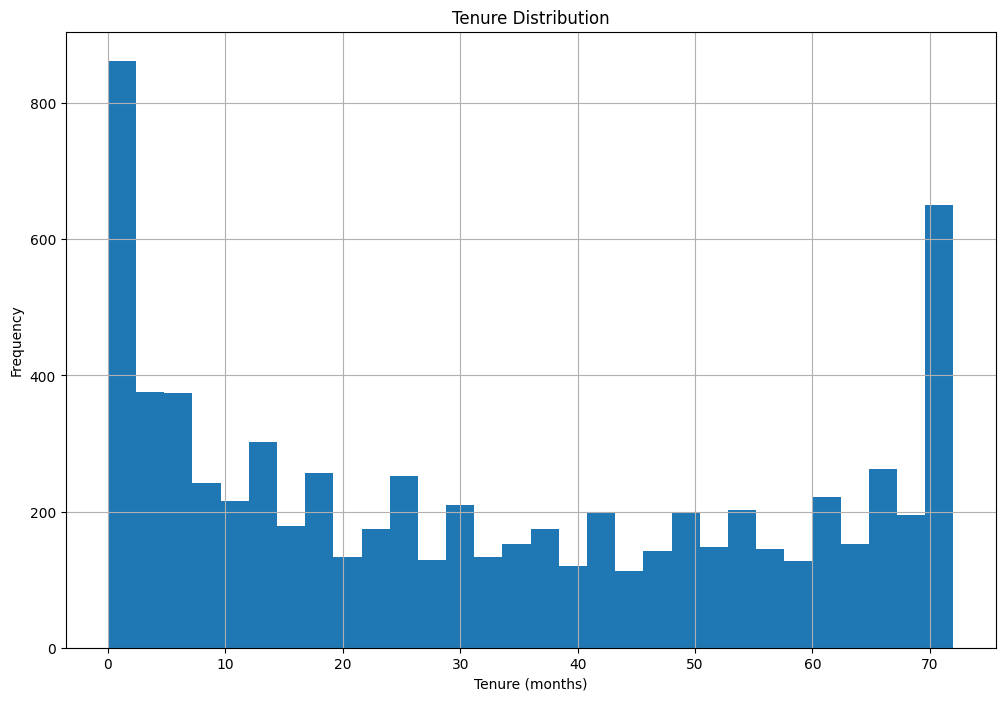

In [ ]:
#Set the figure size for the plot
plt.figure(figsize=(12, 8))

#Create a histogram of the 'Tenure Months' column with 30 bins
df['Tenure Months'].hist(bins=30)

#Add a title and axis labels to the plot
plt.title('Tenure Distribution')    #Title of the histogram
plt.xlabel('Tenure (months)')       #Label for the x-axis
plt.ylabel('Frequency')             #Label for the y-axis

#Display the plot
plt.show()

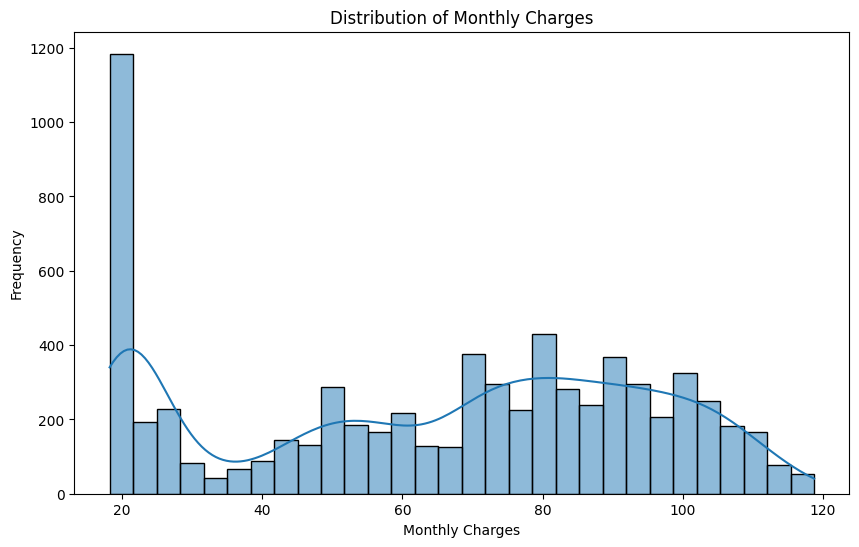

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE) for the 'Monthly Charges' column
sns.histplot(df['Monthly Charges'], bins=30, kde=True)

# Add a title and axis labels to the plot
plt.title('Distribution of Monthly Charges')  # Title of the plot
plt.xlabel('Monthly Charges')                 # Label for the x-axis
plt.ylabel('Frequency')                       # Label for the y-axis

# Display the plot
plt.show()


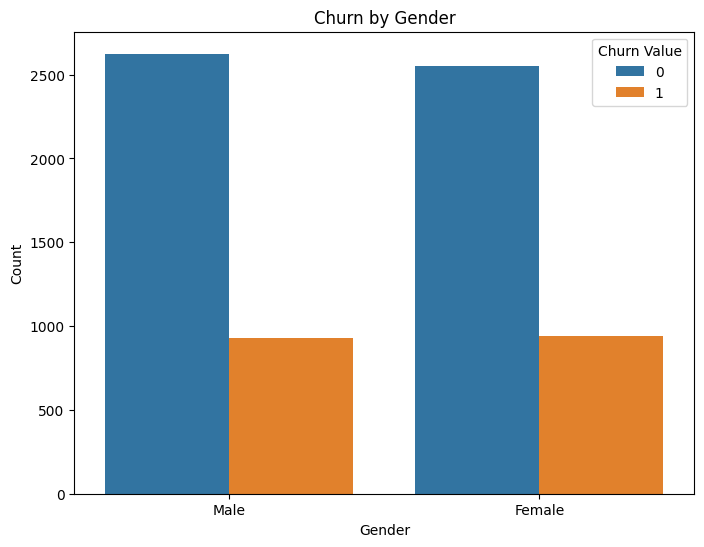

In [ ]:
#Set the figure size for the plot
plt.figure(figsize=(8, 6))

#Create a count plot for 'Gender' with separate bars for each 'Churn Value'
sns.countplot(x='Gender', hue='Churn Value', data=df)

#Add a title and axis labels to the plot
plt.title('Churn by Gender')      #Title of the plot
plt.xlabel('Gender')              #Label for the x-axis
plt.ylabel('Count')               #Label for the y-axis

#Display the plot
plt.show()


# 4.Feature Engineering

In [ ]:
#Select all categorical columns (columns with data type 'object') in the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

#Initialize a LabelEncoder instance
encoder = LabelEncoder()

#Loop through each categorical column and encode it
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])  # Transform categorical values into numeric codes


In [ ]:
#Initialize a StandardScaler instance
scaler = StandardScaler()

#Select all numerical columns (integer and float types) in the DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Scale the numerical columns by standardizing them
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
#Convert 'Churn Value' to binary values (0 or 1)
df['Churn Value'] = (df['Churn Value'] > 0).astype(int)


In [ ]:
#Split data to X and y
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

In [ ]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Prediction model

In [ ]:
#Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

#Print classification report to evaluate the model
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))



Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [ ]:
#Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#Make predictions on the test set
y_pred_rf = rf.predict(X_test)

#Print classification report to evaluate the model
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [ ]:
#Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

#Make predictions on the test set
y_pred_nb = nb.predict(X_test)

#Print classification report to evaluate the model
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



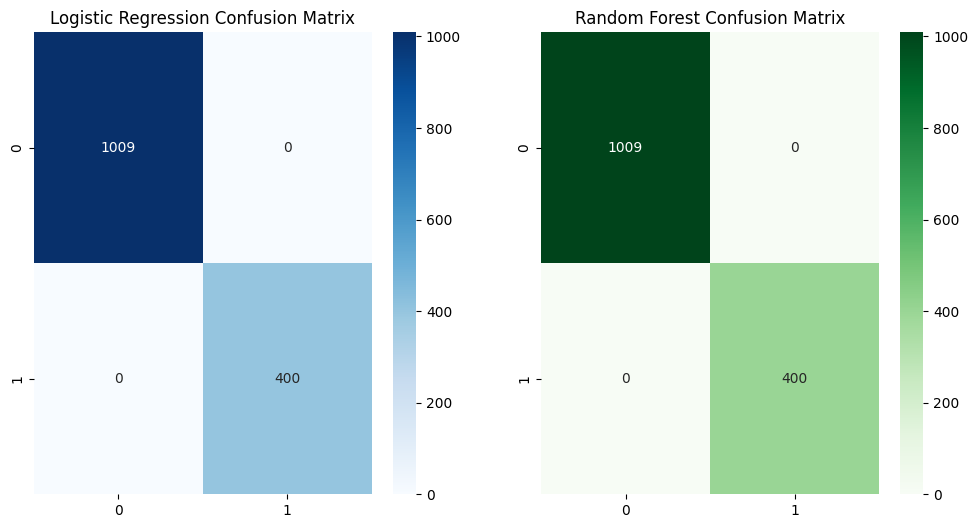

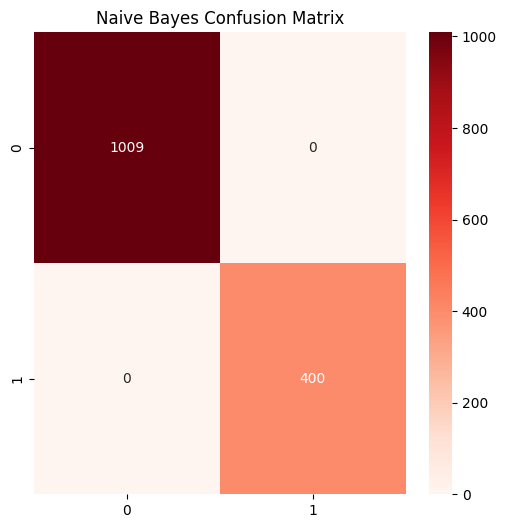

In [ ]:
#Plot confusion matrices for Logistic Regression and Random Forest
#Logistic Regression Confusion Matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

#Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

#Plot Naive Bayes Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Reds')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

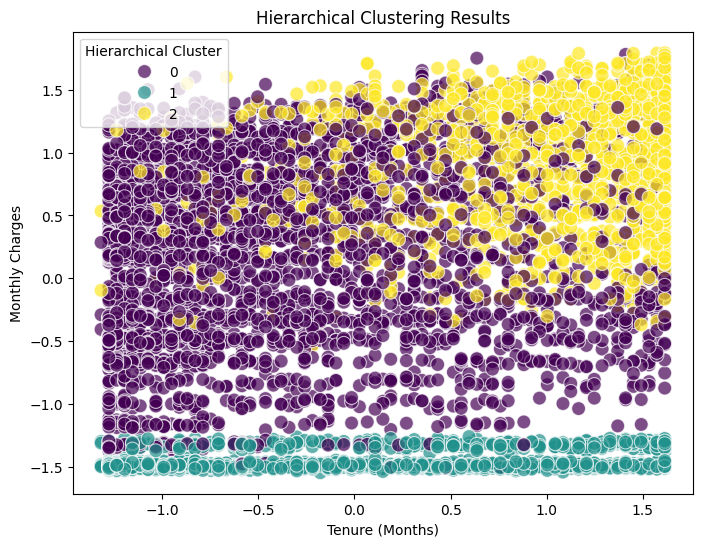


Cluster Distribution:
Hierarchical Cluster
0    4035
2    1507
1    1501
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import AgglomerativeClustering

#Split data to X and y
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

#Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering using Ward linkage
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical Cluster'] = agg_clustering.fit_predict(X_scaled)

#Visualize the clustering results using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Tenure Months'], y=df['Monthly Charges'], hue=df['Hierarchical Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

print("\nCluster Distribution:")
print(df['Hierarchical Cluster'].value_counts())

#6. Interpretation

#Classification

Ketiga model—Logistic Regression, Random Forest, dan Naive Bayes—memiliki kelebihan dan kekurangan masing-masing dalam memprediksi churn pelanggan.

**Logistic Regression** memberikan hasil yang solid sebagai baseline dengan kinerja yang cukup baik, terutama dalam hal precision dan recall. Namun, model ini mungkin tidak dapat menangkap hubungan non-linear yang kompleks dengan baik, yang dapat membatasi efektivitasnya pada beberapa situasi. Sementara itu,

**Random Forest** menunjukkan kinerja yang lebih unggul di hampir semua metrik, termasuk akurasi dan F1-score. Kemampuannya untuk menangani hubungan non-linear dan interaksi antar fitur menjadikannya pilihan yang lebih kuat, meskipun harganya adalah pengorbanan dalam hal interpretasi dan sumber daya komputasi.

**Naive Bayes**, meskipun lebih sederhana dalam hal komputasi, menunjukkan kinerja yang lebih moderat dibandingkan dengan Random Forest, namun tetap memberikan wawasan yang berguna. Model ini bekerja dengan baik ketika asumsi independensi antar fitur terpenuhi, tetapi mungkin tidak seefektif model lain ketika ada ketergantungan antar fitur. Secara keseluruhan, Random Forest menonjol sebagai model yang paling kuat, diikuti oleh Logistic Regression, dengan Naive Bayes menjadi pilihan yang berguna untuk solusi yang lebih cepat atau efisien secara komputasi.

#Clustering


**Hierarchical Clustering**(Agglomerative Clustering) menunjukkan jumlah data pada masing-masing cluster yang dihasilkan. Berikut adalah interpretasinya:

Distribusi Cluster:
Hierarchical Cluster

0 : 4035

2 : 1507

1 : 1501

Penjelasan:

Cluster 0: Memiliki 4035 data point, yang merupakan cluster terbesar di antara ketiganya.

Cluster 2: Memiliki 1507 data point, cluster kedua terbesar.

Cluster 1: Memiliki 1501 data point, yang sedikit lebih kecil daripada Cluster 2 tetapi tetap signifikan.

Distribusi ini berarti algoritma hierarchical clustering telah mengelompokkan data ke dalam tiga cluster dengan ukuran yang bervariasi. Cluster 0 memiliki jumlah data point terbanyak, sementara Cluster 1 dan 2 memiliki distribusi yang lebih seimbang.

Anda dapat menganalisis karakteristik masing-masing cluster dengan melihat nilai-nilai fitur pada setiap cluster (misalnya, Tenure Months, Monthly Charges) dan mengeksplorasi bagaimana cluster-cluster tersebut berbeda satu sama lain. Misalnya, Anda bisa membandingkan nilai rata-rata dari fitur numerik untuk setiap cluster untuk memahami apa yang membedakan mereka.